# 3D Pose Baseline for Openpose

## Quick Start

Install libraries

In [1]:
!pip install pyquaternion
!pip install progress

  Created wheel for progress: filename=progress-1.5-cp37-none-any.whl size=8074 sha256=97b5da15a4bf3e997f236cb047229e43732433f617ecb1483e695de0a8f7262f
  Stored in directory: /root/.cache/pip/wheels/6c/c8/80/32a294e3041f006c661838c05a411c7b7ffc60ff939d14e116
Successfully built progress


Clone repository

In [2]:
import os
import pathlib
import subprocess
from google.colab import files, drive
import pyquaternion

git_repo_url = 'https://github.com/teshima058/3d_pose_baseline_openpose.git'
project_name = os.path.splitext(os.path.basename(git_repo_url))[0]
if not os.path.exists(project_name):
    # clone 3d-pose-baseline
    !git clone -q --depth 1 $git_repo_url
    os.chdir('./3d_pose_baseline_openpose/')
print("Cloned repository")

Cloned repository


Please create "json" folder and upload all the json files output from OpenPose into that folder
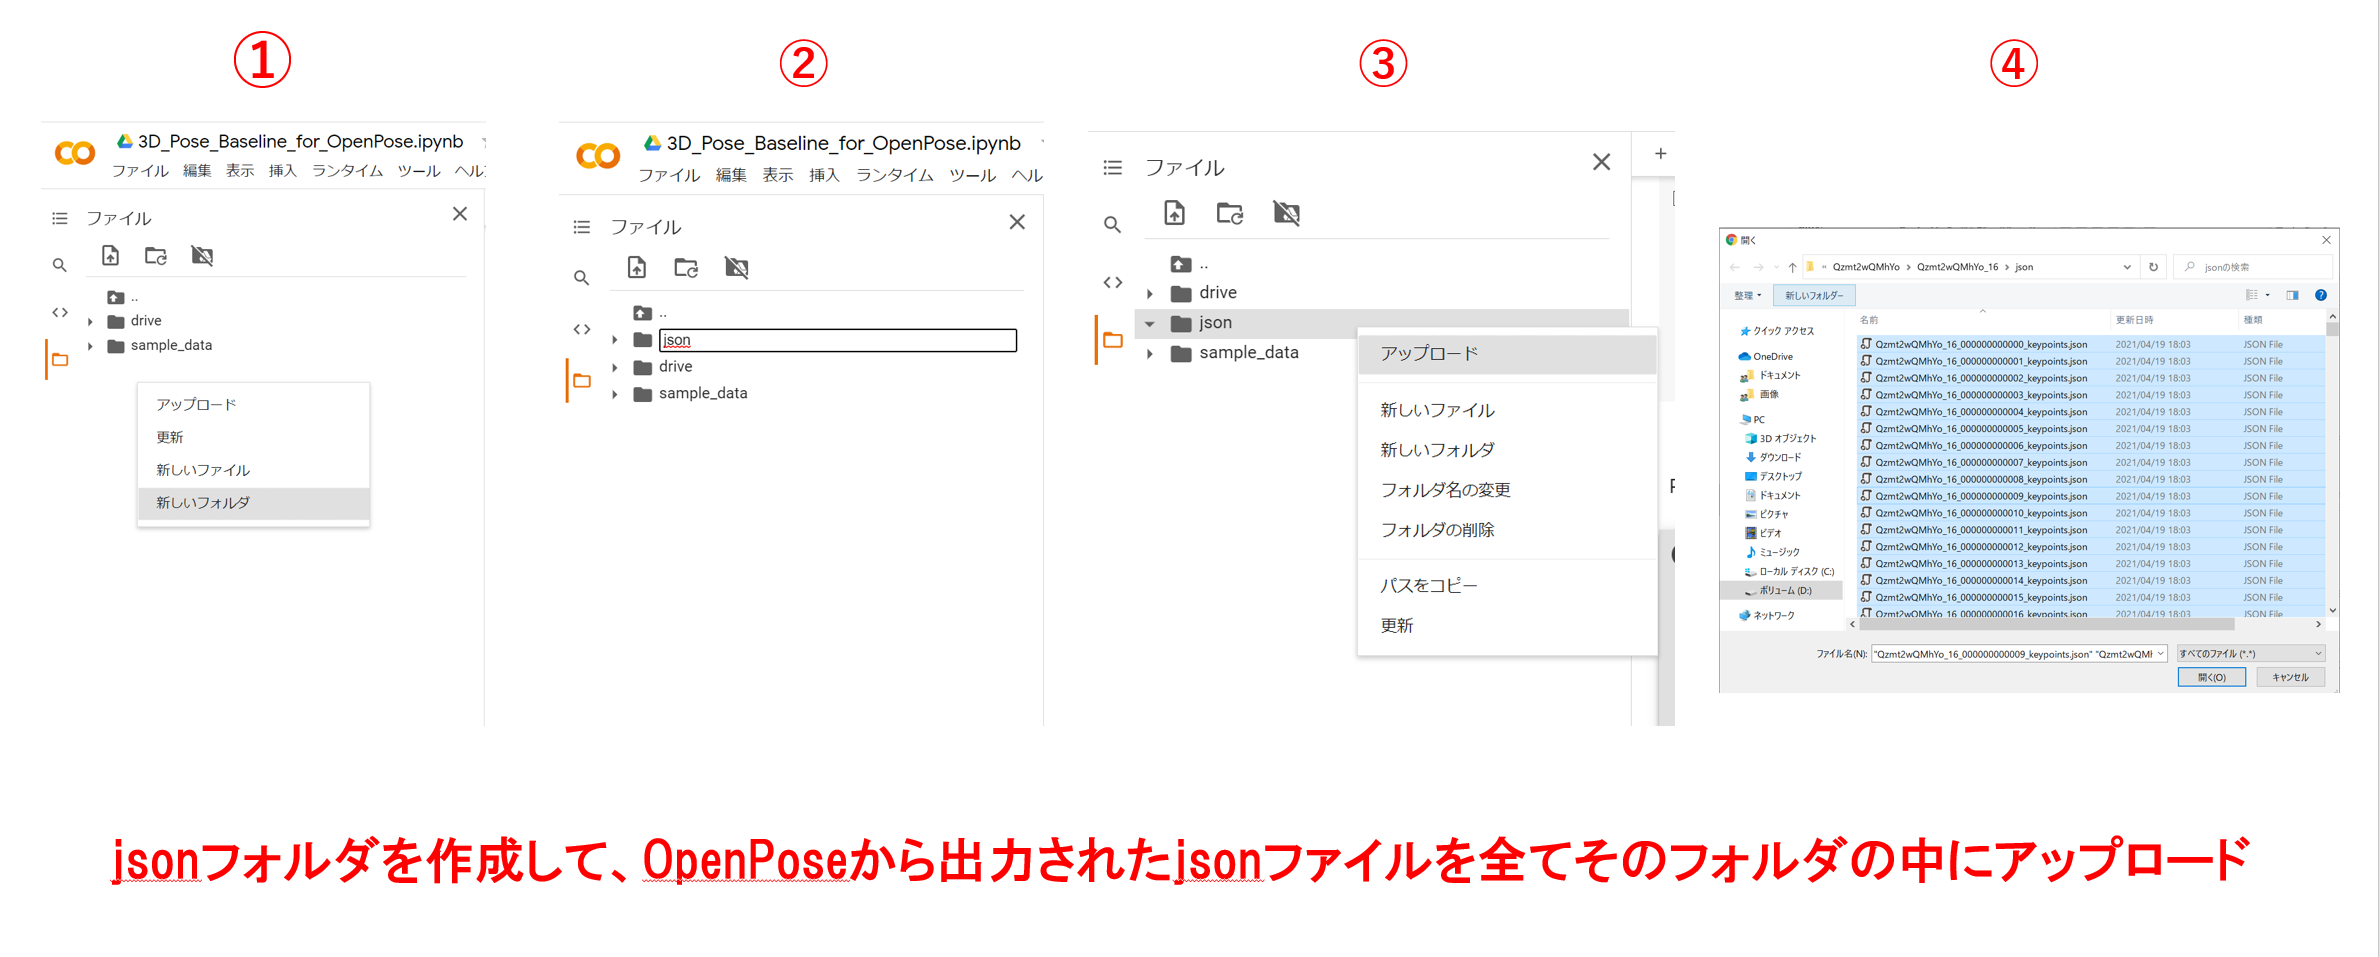

In [8]:
from predict import PoseBaselineForCOCO
from src.plot3D import plot3D, animate3D
from src.cmu2kinect import CMUPose2KinectData

json_dir = '../json/'
model_path = './checkpoint/15joints_best.chkpt'
output_folder = './output/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
save_csv_path = output_folder + '3d-pose.csv'
save_mp4_path = output_folder + '3d-pose.mp4'
fps = 25

print('Predicting 3D-Pose from {}'.format(json_dir))
p = PoseBaselineForCOCO(model_path)

# ----- Predict -----
pose2d, pose3d = p.predict(json_dir, mode='joint15')

# animate3D(pose3d, save_path=save_mp4_path)
CMUPose2KinectData(pose3d, save_csv=save_csv_path, fps=fps)

files.download(save_csv_path)

Predicting 3D-Pose from ../json/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>